# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [791]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [792]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [793]:
print(heroes_df.shape)
heroes_df.head()

(734, 11)


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [794]:
print(powers_df.shape)
powers_df.head()

(667, 168)


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [795]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [796]:
heroes_df.info()
heroes_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [797]:
powers_df.info()
powers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [798]:
power_columns = powers_df.columns.values.tolist()
power_columns

['hero_names',
 'Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Trans

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [799]:
#in Heroes, Created a category 'missing' for Publisher column, and replaced nan with 'missing'
heroes_df['Publisher'] = heroes_df['Publisher'].fillna('missing')
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'missing', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [800]:
#in Heroes, Replaced Weight nan values with median 
#heroes_df[heroes_df['Weight'].isnull()]
heroes_df['Weight'] = heroes_df['Weight'].fillna(heroes_df['Weight'].median())
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [801]:
#in Heroes, dropped Skin color column, too many missing
#heroes_df['Skin color'].value_counts()
heroes_df.drop('Skin color', axis=1, inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

In [802]:
#in Heroes, dropped Eye color column, too many missing
heroes_df['Eye color'].value_counts()
heroes_df.drop('Eye color', axis=1, inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Race          0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

In [803]:
#in Heroes, in Race, Gender, Alignment column, created 'missing' category for missing data
#heroes_df['Gender'].value_counts()
heroes_df['Race'] = heroes_df['Race'].apply(lambda x: x.replace('-', 'missing'))
heroes_df['Gender'] = heroes_df['Gender'].apply(lambda x: x.replace('-', 'missing'))
heroes_df['Alignment'] = heroes_df['Alignment'].apply(lambda x: x.replace('-', 'missing'))

In [804]:
#REplace null weight and height values to median
#heroes_df['Race'].value_counts()
#heroes_df['Weight'].value_counts()
heroes_df['Weight'] = heroes_df['Weight'].replace(-99.0, heroes_df['Weight'].median())
heroes_df['Height'] = heroes_df['Height'].replace(-99.0, heroes_df['Height'].median())

In [805]:
#There is no null value in powers data
powers_df.info()
powers_df.isna().sum()
powers_df.isna().sum().sum()
powers_df['Dimensional Awareness'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


0

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [806]:
heroes_df.set_index('name', inplace=True)
print(heroes_df.head())

            Gender               Race Hair color  Height          Publisher  \
name                                                                          
A-Bomb        Male              Human    No Hair   203.0      Marvel Comics   
Abe Sapien    Male      Icthyo Sapien    No Hair   191.0  Dark Horse Comics   
Abin Sur      Male            Ungaran    No Hair   185.0          DC Comics   
Abomination   Male  Human / Radiation    No Hair   203.0      Marvel Comics   
Abraxas       Male      Cosmic Entity      Black   175.0      Marvel Comics   

            Alignment  Weight  
name                           
A-Bomb           good   441.0  
Abe Sapien       good    65.0  
Abin Sur         good    90.0  
Abomination       bad   441.0  
Abraxas           bad    62.0  


In [807]:
powers_df.set_index('hero_names', inplace=True)
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [808]:
df = heroes_df.join(powers_df, how='inner')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, A-Bomb to Zoom
Columns: 174 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(5)
memory usage: 148.9+ KB


,Gender,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [809]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, A-Bomb to Zoom
Columns: 174 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(5)
memory usage: 148.0+ KB


In [810]:
#There are still null values
df['Height'].unique()

array([203. , 191. , 185. , 175. , 193. , 178. , 188. , 180. , 244. ,
       257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. , 173. ,
       198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. , 226. ,
       267. , 122. , 975. , 142. , 876. ,  62.5, 108. , 701. , 259. ,
       155. ,  71. , 287. , 234. ,  64. , 366. , 206. , 305. , 297. ,
       137. , 279. ,  15.2, 160. , 304.8,  66. ])

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [811]:
df_female = df[df.Gender == 'Female']
df_female.head()
df_male = df[df.Gender == 'Male']
df_male.head()
#female_heroes_df = df.loc[df.Gender == 'Female', ['Height', 'Weight']]
#male_heroes_df = df.loc[df.Gender == 'Male', ['Height', 'Weight']]

,Gender,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


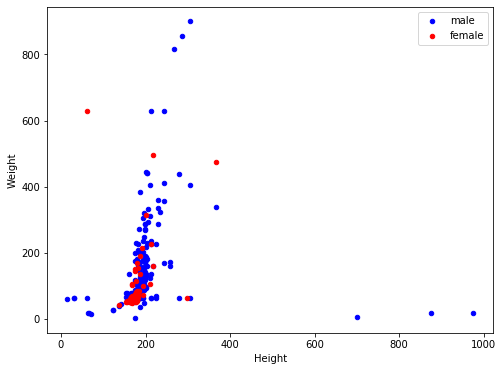

In [812]:
ax1 = df_male.plot.scatter(x='Height', y='Weight', color='blue', label='male', figsize=(8,6))
ax2 = df_female.plot.scatter(x='Height', y='Weight', color='red', label='female', ax=ax1)
#df_female['Weight'].hist()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [813]:
male_heroes_df = df.loc[df.Gender == 'Male', ['Height', 'Weight']]
female_heroes_df = df.loc[df.Gender == 'Female', ['Height', 'Weight']]
#female_heroes_df.head()

def show_distplot(dataframe, gender, column_name):
    x = dataframe.loc[dataframe.Gender == gender, column_name]
    ax = sns.distplot(x)
    ax.legend(labels=gender)

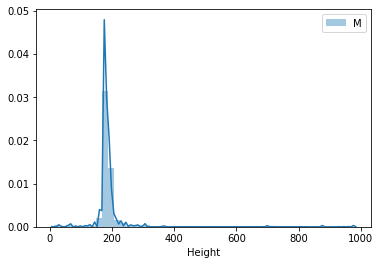

In [814]:
# Male Height
show_distplot(df, 'Male', 'Height')

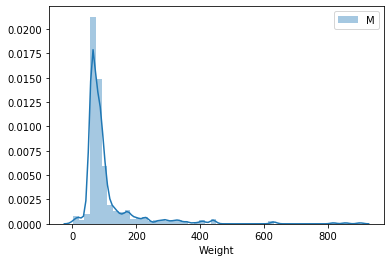

In [815]:
# Male Weight
show_distplot(df, 'Male', 'Weight')

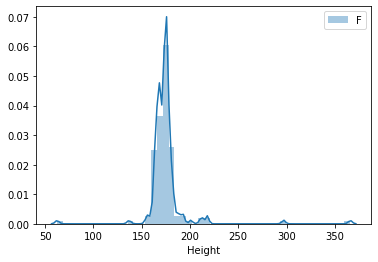

In [816]:
# Female Height
show_distplot(df, 'Female', 'Height')

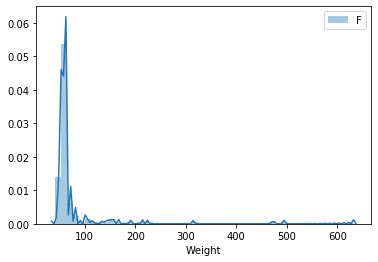

In [817]:
# Female Weight
show_distplot(df, 'Female', 'Weight')

In [818]:
#print("Male Weight: \n", male_heroes_df['Weight'].apply(['mean', 'median']), '\n mode  ', male_heroes_df['Weight'].mode())
#print("Male Height: \n", male_heroes_df['Height'].apply(['mean', 'median']), '\n mode  ', male_heroes_df['Height'].mode())    
#print("Female Weight: \n", female_heroes_df['Weight'].apply(['mean', 'median']), '\n mode  ', female_heroes_df['Weight'].mode())
#print("Female Height: \n", female_heroes_df['Height'].apply(['mean', 'median']), '\n mode  ', female_heroes_df['Height'].mode())
 
df_weight_height = df[['Gender', 'Height', 'Weight']]
df_weight_height.head()
print(df_weight_height.groupby('Gender').agg(['mean', 'median']), '\n\n')

gender_list = ['Male', 'Female']
column_list = ['Height', 'Weight']
for gen in gender_list:
    print(gen)
    df_new = df_weight_height.loc[df_weight_height.Gender == gen]
    for col in column_list:
        print(col, 'mode: ', df_new[col].mode())
    

             Height             Weight       
               mean median        mean median
Gender                                       
Female   174.805085  175.0   75.621469   61.0
Male     188.023861  183.0  107.436009   79.0
missing  176.333333  175.0  106.388889   62.0 


Male
Height mode:  0    175.0
dtype: float64
Weight mode:  0    62.0
dtype: float64
Female
Height mode:  0    175.0
dtype: float64
Weight mode:  0    62.0
dtype: float64


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________
According to the plots and the statistics, we see that the height and weight values are higher in male heroes than female heroes. We can see that clearly in mean and median values. Interestingly the mode is exactly same for male and female for both height and weight. Mainly, we see a normal distribution for all plots, peaking around the mode.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [819]:
powers_list = list(powers_df.columns)
def find5powers(data):
    powers_dict = {}
    for power in powers_list:
        powers_dict[power] = data[power].sum()
#sorted(powers_dict)
    powers_data = pd.DataFrame.from_dict(powers_dict, orient='index', columns=['Count'])
    powers_data_sorted = powers_data.sort_values('Count', ascending=False)
    powers_data_top20 = powers_data_sorted.iloc[0:20]
    powers_data_top20.plot.barh()
    print('5 most common powers: \n', powers_data_top20[0:5])

5 most common powers: 
                 Count
Super Strength    361
Stamina           291
Durability        261
Super Speed       251
Agility           242


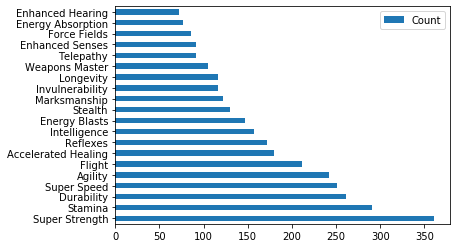

In [820]:
find5powers(df)

Marvel Universe
5 most common powers: 
                 Count
Super Strength    204
Durability        154
Stamina           150
Super Speed       137
Agility           126


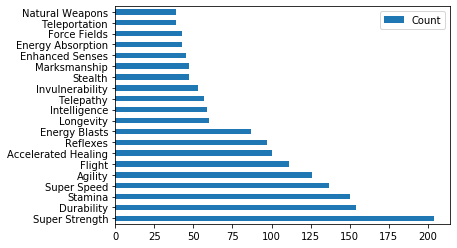

In [821]:
df_marvel = df[df.Publisher == 'Marvel Comics']
print("Marvel Universe")
find5powers(df_marvel)

DC Universe
5 most common powers: 
                 Count
Super Strength    109
Stamina            89
Flight             86
Super Speed        79
Durability         71


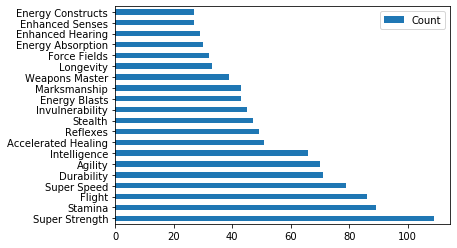

In [822]:
df_dc = df[df.Publisher == 'DC Comics']
print("DC Universe")
find5powers(df_dc)

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
Marvel and DC Universe agree on 4 of the 5 top powers. They both have Super Strength, Stamina, Durability, and Super Speed. The Marvel has Agility in top 5 and DC has Flight. The Marvel top 5 powers is same as the overall list, but the order is different. All distributions (Marvel, DC and all) have the "Super Strength' as the most common power.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [902]:
df2 = df.copy()
df2['number of powers'] = df2.iloc[:, 7:174].sum(1)
df2.columns

Index(['Gender', 'Race', 'Hair color', 'Height', 'Publisher', 'Alignment',
       'Weight', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       ...
       'Reality Warping', 'Odin Force', 'Symbiote Costume', 'Speed Force',
       'Phoenix Force', 'Molecular Dissipation', 'Vision - Cryo',
       'Omnipresent', 'Omniscient', 'number of powers'],
      dtype='object', length=175)

In [903]:
df_superman = df2[df2.index == 'Superman']
df_superman.iloc[0]
powers = df2.iloc[:, 7:174].columns
superpowers = []
for col in powers:
    if df_superman[col][0] == True:
        superpowers.append(col)
print(superpowers)

['Agility', 'Accelerated Healing', 'Cold Resistance', 'Durability', 'Energy Absorption', 'Flight', 'Marksmanship', 'Longevity', 'Intelligence', 'Super Strength', 'Stamina', 'Super Speed', 'Enhanced Senses', 'Energy Beams', 'Jump', 'Enhanced Memory', 'Reflexes', 'Invulnerability', 'Fire Resistance', 'Enhanced Hearing', 'Hypnokinesis', 'Enhanced Sight', 'Heat Resistance', 'Enhanced Smell', 'Vision - Telescopic', 'Vision - Microscopic', 'Super Breath', 'Vision - Heat', 'Vision - X-Ray']


In [904]:
df2['number of superpowers'] = df2.loc[:, superpowers].sum(1)
df2.columns

Index(['Gender', 'Race', 'Hair color', 'Height', 'Publisher', 'Alignment',
       'Weight', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       ...
       'Odin Force', 'Symbiote Costume', 'Speed Force', 'Phoenix Force',
       'Molecular Dissipation', 'Vision - Cryo', 'Omnipresent', 'Omniscient',
       'number of powers', 'number of superpowers'],
      dtype='object', length=176)

In [905]:
df2['Race'].value_counts()

missing           245
Human             194
Mutant             61
God / Eternal      14
Cyborg             11
                 ... 
Ungaran             1
Spartoi             1
Yoda's species      1
Parademon           1
Bolovaxian          1
Name: Race, Length: 61, dtype: int64

In [906]:
df2['Race2'] = 'others'
df2.loc[df2['Race'] == 'Human', 'Race2'] = 'Human'
df2.loc[df2['Race'] == 'Mutant', 'Race2'] = 'Mutant'
df2.loc[df2['Race'] == 'God / Eternal', 'Race2'] = 'God / Eternal'
#df2.columns

In [907]:
#Remove rows with missing Alignment
df2

,Gender,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,number of powers,number of superpowers,Race2
A-Bomb,Male,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,False,...,False,False,False,False,False,False,False,7,5,Human
Abe Sapien,Male,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,False,...,False,False,False,False,False,False,False,16,11,others
Abin Sur,Male,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,True,...,False,False,False,False,False,False,False,1,0,others
Abomination,Male,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,False,...,False,False,False,False,False,False,False,8,7,others
Abraxas,Male,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,False,False,False,...,False,False,False,False,False,False,False,14,5,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0,False,False,False,...,False,False,False,False,False,False,False,3,1,Human
Ymir,Male,Frost Giant,No Hair,304.8,Marvel Comics,good,62.0,False,False,False,...,False,False,False,False,False,False,False,6,4,others
Yoda,Male,Yoda's species,White,66.0,George Lucas,good,17.0,True,False,False,...,False,False,False,False,False,False,False,19,8,others
Zatanna,Female,Human,Black,170.0,DC Comics,good,57.0,False,False,False,...,False,False,False,False,False,False,False,8,0,Human


In [908]:
selected_powers = ['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'number of powers', 'number of superpowers']
df2[df2['number of powers'] > 30][selected_powers]

,Super Strength,Stamina,Durability,Super Speed,Agility,number of powers,number of superpowers
Amazo,True,True,True,True,True,44,21
Captain Marvel,True,True,True,True,True,33,19
Captain Marvel,True,True,True,True,True,33,19
Galactus,True,True,True,True,False,32,12
Living Tribunal,True,False,False,True,True,35,9
Man of Miracles,True,False,False,True,False,34,10
Martian Manhunter,True,True,True,True,True,35,17
Mister Mxyzptlk,False,False,False,False,True,31,6
Odin,True,True,True,True,True,31,11
One-Above-All,True,False,True,True,True,31,9


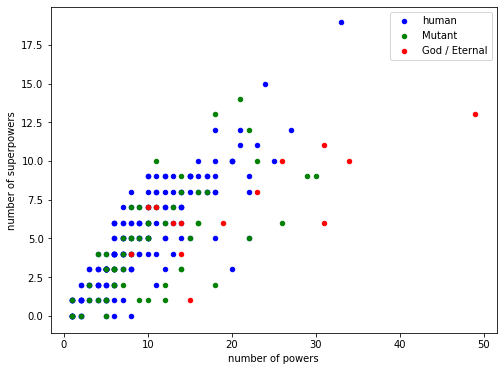

In [913]:
ax1 = df2[df2.Race2 == 'Human'].plot.scatter(x='number of powers', y='number of superpowers', color='blue', label='human', figsize=(8,6))
ax2 = df2[df2.Race2 == 'Mutant'].plot.scatter(x='number of powers', y='number of superpowers', color='green', label='Mutant', ax=ax1)
ax3 = df2[df2.Race2 == 'God / Eternal'].plot.scatter(x='number of powers', y='number of superpowers', color='red', label='God / Eternal', ax=ax2)


In [914]:
df_grouped = df2.groupby(['Race2', 'Alignment'])[selected_powers].agg(['mean', 'sum'])
df_grouped

Super Strength          Stamina       Durability  \
                                  mean    sum      mean   sum       mean   
Race2         Alignment                                                    
God / Eternal bad             0.800000    4.0  0.400000   2.0   0.600000   
              good            0.833333    5.0  0.666667   4.0   0.166667   
              missing         0.500000    1.0  0.000000   0.0   0.000000   
              neutral         1.000000    1.0  1.000000   1.0   0.000000   
Human         bad             0.553191   26.0  0.489362  23.0   0.425532   
              good            0.430657   59.0  0.576642  79.0   0.328467   
              missing         0.000000    0.0  0.000000   0.0   0.000000   
              neutral         0.444444    4.0  0.333333   3.0   0.222222   
Mutant        bad             0.750000    9.0  0.500000   6.0   0.500000   
              good            0.386364   17.0  0.409091  18.0   0.272727   
              missing         1.000000    1.0  1.000000   1.0   0.000000   
              neutral         0.500000    2.0  0.750000   3.0   0.250000   
others        bad             0.674419   87.0  0.418605  54.0   0.457364   
              good            0.542857  133.0  0.367347  90.0   0.416327   
              missing         1.000000    3.0  0.666667   2.0   1.000000   
              neutral         0.900000    9.0  0.500000   5.0   0.700000   

                               Super Speed         Agility        \
                           sum        mean   sum      mean   sum   
Race2         Alignment                                            
God / Eternal bad          3.0    0.200000   1.0  0.200000   1.0   
              good         1.0    0.666667   4.0  0.500000   3.0   
              missing      0.0    0.500000   1.0  0.000000   0.0   
              neutral      0.0    1.000000   1.0  1.000000   1.0   
Human         bad         20.0    0.425532  20.0  0.425532  20.0   
              good        45.0    0.379562  52.0  0.554745  76.0   
              missing      0.0    0.000000   0.0  0.000000   0.0   
              neutral      2.0    0.333333   3.0  0.555556   5.0   
Mutant        bad          6.0    0.166667   2.0  0.500000   6.0   
              good        12.0    0.272727  12.0  0.431818  19.0   
              missing      0.0    0.000000   0.0  1.000000   1.0   
              neutral      1.0    0.250000   1.0  0.750000   3.0   
others        bad         59.0    0.418605  54.0  0.279070  36.0   
              good       102.0    0.375510  92.0  0.265306  65.0   
              missing      3.0    0.333333   1.0  0.333333   1.0   
              neutral      7.0    0.700000   7.0  0.500000   5.0   

                        number of powers       number of superpowers        
                                    mean   sum                  mean   sum  
Race2         Alignment                                                     
God / Eternal bad              18.600000    93              6.200000    31  
              good             23.833333   143              8.500000    51  
              missing          24.500000    49              5.500000    11  
              neutral          13.000000    13              6.000000     6  
Human         bad               8.042553   378              4.468085   210  
              good              9.423358  1291              4.985401   683  
              missing           1.000000     1              1.000000     1  
              neutral           6.666667    60              3.444444    31  
Mutant        bad              12.916667   155              5.750000    69  
              good              9.704545   427              4.227273   186  
              missing           6.000000     6              3.000000     3  
              neutral          15.000000    60              6.500000    26  
others        bad               9.124031  1177              5.124031   661  
              good              7.579592  1857        

In [915]:
df_grouped = df_grouped.reset_index()
df_grouped

Race2 Alignment Super Strength          Stamina       Durability  \
                                      mean    sum      mean   sum       mean   
0   God / Eternal       bad       0.800000    4.0  0.400000   2.0   0.600000   
1   God / Eternal      good       0.833333    5.0  0.666667   4.0   0.166667   
2   God / Eternal   missing       0.500000    1.0  0.000000   0.0   0.000000   
3   God / Eternal   neutral       1.000000    1.0  1.000000   1.0   0.000000   
4           Human       bad       0.553191   26.0  0.489362  23.0   0.425532   
5           Human      good       0.430657   59.0  0.576642  79.0   0.328467   
6           Human   missing       0.000000    0.0  0.000000   0.0   0.000000   
7           Human   neutral       0.444444    4.0  0.333333   3.0   0.222222   
8          Mutant       bad       0.750000    9.0  0.500000   6.0   0.500000   
9          Mutant      good       0.386364   17.0  0.409091  18.0   0.272727   
10         Mutant   missing       1.000000    1.0  1.000000   1.0   0.000000   
11         Mutant   neutral       0.500000    2.0  0.750000   3.0   0.250000   
12         others       bad       0.674419   87.0  0.418605  54.0   0.457364   
13         others      good       0.542857  133.0  0.367347  90.0   0.416327   
14         others   missing       1.000000    3.0  0.666667   2.0   1.000000   
15         others   neutral       0.900000    9.0  0.500000   5.0   0.700000   

          Super Speed         Agility       number of powers        \
      sum        mean   sum      mean   sum             mean   sum   
0     3.0    0.200000   1.0  0.200000   1.0        18.600000    93   
1     1.0    0.666667   4.0  0.500000   3.0        23.833333   143   
2     0.0    0.500000   1.0  0.000000   0.0        24.500000    49   
3     0.0    1.000000   1.0  1.000000   1.0        13.000000    13   
4    20.0    0.425532  20.0  0.425532  20.0         8.042553   378   
5    45.0    0.379562  52.0  0.554745  76.0         9.423358  1291   
6     0.0    0.000000   0.0  0.000000   0.0         1.000000     1   
7     2.0    0.333333   3.0  0.555556   5.0         6.666667    60   
8     6.0    0.166667   2.0  0.500000   6.0        12.916667   155   
9    12.0    0.272727  12.0  0.431818  19.0         9.704545   427   
10    0.0    0.000000   0.0  1.000000   1.0         6.000000     6   
11    1.0    0.250000   1.0  0.750000   3.0        15.000000    60   
12   59.0    0.418605  54.0  0.279070  36.0         9.124031  1177   
13  102.0    0.375510  92.0  0.265306  65.0         7.579592  1857   
14    3.0    0.333333   1.0  0.333333   1.0        14.666667    44   
15    7.0    0.700000   7.0  0.500000   5.0        18.700000   187   

   number of superpowers        
                    mean   sum  
0               6.200000    31  
1               8.500000    51  
2               5.500000    11  
3               6.000000     6  
4               4.468085   210  
5               4.985401   683  
6               1.000000     1  
7               3.444444    31  
8               5.750000    69  
9               4.227273   186  
10              3.000000     3  
11              6.500000    26  
12              5.124031   661  
13              4.489796  1100  
14              6.000000    18  
15              9.200000    92

In [916]:
cols0 = df_grouped.columns.get_level_values(0)
cols1 = df_grouped.columns.get_level_values(1)
df_grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
df_grouped.columns

Index(['Race2', 'Alignment', 'Super Strength_mean', 'Super Strength_sum',
       'Stamina_mean', 'Stamina_sum', 'Durability_mean', 'Durability_sum',
       'Super Speed_mean', 'Super Speed_sum', 'Agility_mean', 'Agility_sum',
       'number of powers_mean', 'number of powers_sum',
       'number of superpowers_mean', 'number of superpowers_sum'],
      dtype='object')

In [917]:
df_grouped

,Race2,Alignment,Super Strength_mean,Super Strength_sum,Stamina_mean,Stamina_sum,Durability_mean,Durability_sum,Super Speed_mean,Super Speed_sum,Agility_mean,Agility_sum,number of powers_mean,number of powers_sum,number of superpowers_mean,number of superpowers_sum
0,God / Eternal,bad,0.800000,4.0,0.400000,2.0,0.600000,3.0,0.200000,1.0,0.200000,1.0,18.600000,93,6.200000,31
1,God / Eternal,good,0.833333,5.0,0.666667,4.0,0.166667,1.0,0.666667,4.0,0.500000,3.0,23.833333,143,8.500000,51
2,God / Eternal,missing,0.500000,1.0,0.000000,0.0,0.000000,0.0,0.500000,1.0,0.000000,0.0,24.500000,49,5.500000,11
3,God / Eternal,neutral,1.000000,1.0,1.000000,1.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,13.000000,13,6.000000,6
4,Human,bad,0.553191,26.0,0.489362,23.0,0.425532,20.0,0.425532,20.0,0.425532,20.0,8.042553,378,4.468085,210
5,Human,good,0.430657,59.0,0.576642,79.0,0.328467,45.0,0.379562,52.0,0.554745,76.0,9.423358,1291,4.985401,683
6,Human,missing,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,1,1.000000,1
7,Human,neutral,0.444444,4.0,0.333333,3.0,0.222222,2.0,0.333333,3.0,0.555556,5.0,6.666667,60,3.444444,31
8,Mutant,bad,0.750000,9.0,0.500000,6.0,0.500000,6.0,0.166667,2.0,0.500000,6.0,12.916667,155,5.750000,69
9,Mutant,good,0.386364,17.0,0.409091,18.0,0.272727,12.0,0.272727,12.0,0.431818,19.0,9.704545,427,4.227273,186


In [918]:
#Cleaning missing alignment
remove_list = df_grouped[df_grouped['Alignment'] == 'missing'].index
print(remove_list)
df_grouped.drop(remove_list, inplace=True)
df_grouped.reset_index(drop=True, inplace=True)
df_grouped

Int64Index([2, 6, 10, 14], dtype='int64')


,Race2,Alignment,Super Strength_mean,Super Strength_sum,Stamina_mean,Stamina_sum,Durability_mean,Durability_sum,Super Speed_mean,Super Speed_sum,Agility_mean,Agility_sum,number of powers_mean,number of powers_sum,number of superpowers_mean,number of superpowers_sum
0,God / Eternal,bad,0.800000,4.0,0.400000,2.0,0.600000,3.0,0.200000,1.0,0.200000,1.0,18.600000,93,6.200000,31
1,God / Eternal,good,0.833333,5.0,0.666667,4.0,0.166667,1.0,0.666667,4.0,0.500000,3.0,23.833333,143,8.500000,51
2,God / Eternal,neutral,1.000000,1.0,1.000000,1.0,0.000000,0.0,1.000000,1.0,1.000000,1.0,13.000000,13,6.000000,6
3,Human,bad,0.553191,26.0,0.489362,23.0,0.425532,20.0,0.425532,20.0,0.425532,20.0,8.042553,378,4.468085,210
4,Human,good,0.430657,59.0,0.576642,79.0,0.328467,45.0,0.379562,52.0,0.554745,76.0,9.423358,1291,4.985401,683
5,Human,neutral,0.444444,4.0,0.333333,3.0,0.222222,2.0,0.333333,3.0,0.555556,5.0,6.666667,60,3.444444,31
6,Mutant,bad,0.750000,9.0,0.500000,6.0,0.500000,6.0,0.166667,2.0,0.500000,6.0,12.916667,155,5.750000,69
7,Mutant,good,0.386364,17.0,0.409091,18.0,0.272727,12.0,0.272727,12.0,0.431818,19.0,9.704545,427,4.227273,186
8,Mutant,neutral,0.500000,2.0,0.750000,3.0,0.250000,1.0,0.250000,1.0,0.750000,3.0,15.000000,60,6.500000,26
9,others,bad,0.674419,87.0,0.418605,54.0,0.457364,59.0,0.418605,54.0,0.279070,36.0,9.124031,1177,5.124031,661


In [919]:
df_grouped.pivot(index='Race2', columns='Alignment', values='number of powers_mean')

Alignment,bad,good,neutral
Race2,,,
God / Eternal,18.600000,23.833333,13.000000
Human,8.042553,9.423358,6.666667
Mutant,12.916667,9.704545,15.000000
others,9.124031,7.579592,18.700000


In [920]:
df_grouped.pivot(index='Race2', columns='Alignment', values='number of superpowers_mean')

Alignment,bad,good,neutral
Race2,,,
God / Eternal,6.200000,8.500000,6.000000
Human,4.468085,4.985401,3.444444
Mutant,5.750000,4.227273,6.500000
others,5.124031,4.489796,9.200000


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data